There are 30 images
Starting at frame 3
Frames array [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]


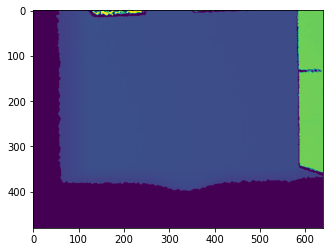

In [87]:
import h5py
from matplotlib import pyplot as plt
from time import sleep
import numpy as np
import cv2

filename = r"test_files\test.h5py"
with h5py.File(filename, "r") as f:

    frames = f.get("frameN")[:]
    depth = f.get("depth")[:]
    # color = f.get("color")[:]
    infrared = f.get("infrared")[:]
    plt.imshow(depth[0])
    num_of_imgs = frames.shape[0]

    print(f'There are {num_of_imgs} images')
    print(f"Starting at frame {frames[0]}\nFrames array {frames}")

In [2]:
# live stream to see what you are recording
from intel_realsense_devices.recorder import Recorder
config_filename = "test_files\config_L151_f1320305.yaml"
recorder = Recorder(config_filename, "random")
recorder.live_stream()


RuntimeError: Frame didn't arrive within 5000

: 

In [76]:
# computation class that calcualtes stats of an image
import numpy as np
import statistics
from matplotlib import pyplot as plt
RGB = 3
class Computation:
    
    def __init__(self, frame_array, frame_type, rgb):
        self.frame_array = frame_array
        self.num_of_imgs = frame_array.shape[0]
        self.row = frame_array.shape[1]
        self.col = frame_array.shape[2]
        self.rgb = rgb
        self.frame_type = frame_type

        self.mean = np.mean(frame_array, axis = 0, dtype=np.float64)
        self.std = np.std(frame_array, axis = 0, dtype=np.float64)
        self.variance =  np.var(frame_array, axis = 0, dtype=np.float64)

        self.median = np.median(frame_array, axis = 0)
        self.max = np.amax(frame_array, axis = 0)
        self.min = np.amin(frame_array, axis = 0)
    
    def print_computation(self):
        dicts = {"first image": self.frame_array[0],
                "mean" : self.mean,
                "std" : self.std,
                "variance" : self.variance,
                "median" : self.median,
                "min" : self.min,
                "max" : self.max,
        }
        for key, val in dicts.items():
            plt.figure()
            plt.imshow(val)
            plt.colorbar()
            plt.title(key)

depth_computation = Computation(depth,"Depth", False)
depth_computation.print_computation()

In [81]:
# testing files in my dierctory
import os
# assign directory
# C:\Users\ABDELN~1\AppData\Local\Temp\tmpeyfnacfd 
# This contains my first test using 10 files for 10 images
directory = r"C:\Users\ABDELN~1\AppData\Local\Temp\tmpeyfnacfd"
files = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    
    # checking if it is a file
    if os.path.isfile(f):
        files.append(file)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not File

In [1]:
from matplotlib import pyplot as plt
from time import time, sleep
import tempfile 
from time import sleep
import h5py
import os
import numpy as np
import cv2

COLOR = "color"
FRAMEN = "framen"
DEPTH = "depth"
INFRARED = "infrared"

MEAN = "mean"
STD = "std"
VAR = "VAR"

In [1]:
import tempfile  
# creates a temp dir that stores the h5oy files 
f = tempfile.mkdtemp()
files = []
from intel_realsense_devices.recorder import Recorder
laser_intensity_factor = 20

config_filename = "test_files\config_L151_f1320305.yaml"
# config_filename = "test_files\config_L515_f1231322.yaml"

for i in range(0,101, laser_intensity_factor):
    print("Intensity ", i)
    h5py_filename = os.path.join(f, "file" + str(i) + ".h5py", )
    files.append(h5py_filename)
    recorder = Recorder(config_filename, h5py_filename)
    recorder.device.driver.set_laser_intensity(i)
    recorder.start() 
    recorder.stop()
    recorder.save_h5py_file()
    recorder.device.driver.hardware_reset()
    sleep(5)
print(f)


Intensity  0
stopping both


AttributeError: 'NoneType' object has no attribute 'get_device'

In [ ]:
file_dict = {}

for i in range(len(files)):
    with h5py.File(files[i], "r") as f:

        frames = f.get("frameN")[:]
        depth = f.get("depth")[:]
        infrared = f.get("infrared")[:]

        data = {
            # COLOR : color,
            DEPTH : depth,
            INFRARED : infrared
        }        

        img_dicts = {}

        # calculates the computation for the frame type
        for frame_type, images in data.items():
            img_computation = {}

            img_computation[MEAN] = np.mean(images, axis = 0, dtype=np.float64)
            img_computation[STD] = np.std(images, axis = 0, dtype=np.float64)
            img_computation[VAR] = np.var(images, axis = 0, dtype=np.float64)
            
            img_dicts[frame_type] = img_computation

        file_dict["file"+ str(i)] = img_dicts
        print(f'file {i} -> {frames}')


        

file 0 -> [ 7  8  9 10 10 11 12 13 14 15 16 17 18 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34]
file 1 -> [10 10 11 12 13 14 15 16 17 18 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34  1  2  3]
file 2 -> [ 8  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 32 33 34 34]
file 3 -> [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 32 33 34 34  1  2]
file 4 -> [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 24 25 26 27 28
 29 30 31 32 33 34]
file 5 -> [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 24 25 26 27 28 29
 30 31 32 33 34  1]
file 6 -> [ 9  9 10 11 12 13 13 14 15 16 17 18 19 19 20 21 22 23 24 25 26 27 28 30
 31 31 32 33 34 35]
file 7 -> [ 9 10 11 12 13 13 14 15 16 17 18 19 19 20 21 22 23 24 25 26 27 28 30 31
 31 32 33 34 35  1]
file 8 -> [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 33]
file 9 -> [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26

NameError: name 'num_of_imgs' is not defined

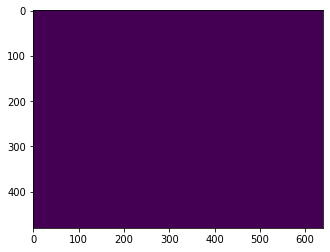

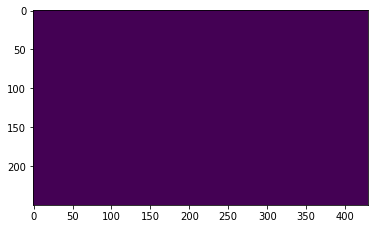

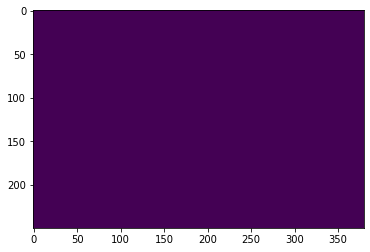

In [ ]:
import cv2
from typing import Optional, Tuple
import numpy as np
import cv2
# plays a live stream of the last file that was saved. 
# test the image slice 
def colorize(
    image: np.ndarray,
    clipping_range: Tuple[Optional[int], Optional[int]] = (None, None),
    colormap: int = cv2.COLORMAP_HSV,
) -> np.ndarray:
    if clipping_range[0] or clipping_range[1]:
        img = image.clip(clipping_range[0], clipping_range[1])
    else:
        img = image.copy()
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img = cv2.applyColorMap(img, colormap)
    return img


# Testing different slices.
# different slices can produce different results. 
plt.figure()
plt.imshow(depth[0])

plt.figure()
plt.imshow(depth[0][150:400,70:500])

plt.figure()
plt.imshow(depth[0][150:400,120:500])

# live stream color imgs in slow motion
for i in range(num_of_imgs):
    if depth[i] is not None:
        sleep(.1)
        cv2.imshow("Depth", colorize(depth[i], (None, 5000)))

    key = cv2.waitKey(10)
    if key != -1:
        cv2.destroyAllWindows()
cv2.destroyAllWindows()


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


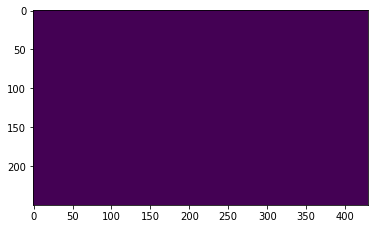

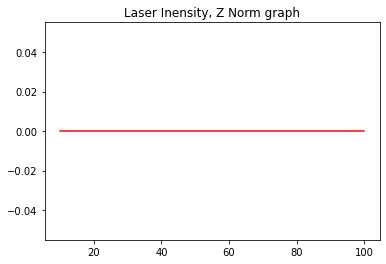

In [ ]:
from scipy.linalg import norm
num_of_imgs = len(files)
imgs = []

img1 = file_dict["file0"]["depth"]["mean"][150:400,70:500]
plt.figure()
plt.imshow(img1)

for i in range(num_of_imgs):
    imgs.append(file_dict["file"+ str(i)]["depth"]["mean"][150:400,70:500])

# imgs_division_img1 = []
# diff_img1 = []
# # divide all images by image 1 
# for i in range(len(imgs)):
#     imgs_division_img1.append(np.divide(imgs[i], img1))

# for i in range(len(imgs)):
#     difference = imgs[i] - img1
#     diff_img1.append(difference)

z_norm_l = []

for img in range(1,len(imgs)):
    diff = imgs[img] - img1  
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    # print(" ", z_norm)
    # print("Manhattan norm:", m_norm, "/ per pixel:", m_norm/img1.size)
    # print("Zero norm:", z_norm, "/ per pixel:", z_norm*1.0/img1.size)
    z_norm_l.append(z_norm*1.0/img1.size)

print(z_norm_l)
x = [i*laser_intensity_factor for i in range(1, num_of_imgs)]

print(x)

plt.figure()
plt.title("Laser Inensity, Z Norm graph")
plt.plot(x, z_norm_l, color="red")
plt.show()

    

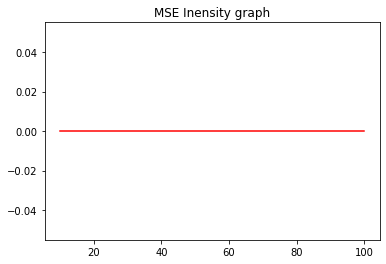

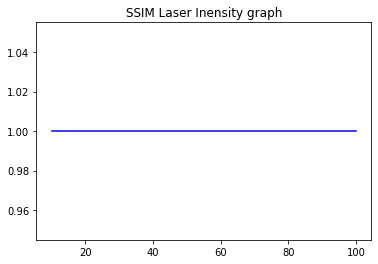

In [ ]:
from skimage.metrics import structural_similarity as ssim


def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

mse_l = []
ssim_l = []

for img in range(1,len(imgs)):
	mse_value = mse(imgs[img],img1)
	ssim_value = ssim(imgs[img],img1)
	mse_l.append(mse_value)
	ssim_l.append(ssim_value)


plt.title("MSE Inensity graph")
plt.plot(x, mse_l, color="red")
plt.show()


plt.title("SSIM Laser Inensity graph")
plt.plot(x, ssim_l, color="blue")
plt.show()
        